## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [2]:
df = pd.read_csv('chess_games.csv')
df.head(5)

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


## Data understanding and cleaning

In [3]:
df.drop(columns = ['moves','opening_response','opening_variation','opening_code','opening_moves'],inplace=True)
df.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,opening_fullname,opening_shortname
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,Slav Defense: Exchange Variation,Slav Defense
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,King's Pawn Game: Leonardis Variation,King's Pawn Game
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,Philidor Defense,Philidor Defense


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  opening_fullname   20058 non-null  object
 11  opening_shortname  20058 non-null  object
dtypes: bool(1), int64(4), object(7)
memory usage: 1.7+ MB


In [5]:
df.isnull().sum()

game_id              0
rated                0
turns                0
victory_status       0
winner               0
time_increment       0
white_id             0
white_rating         0
black_id             0
black_rating         0
opening_fullname     0
opening_shortname    0
dtype: int64

In [6]:
df.shape

(20058, 12)

In [7]:
df.opening_fullname.unique()

array(['Slav Defense: Exchange Variation',
       'Nimzowitsch Defense: Kennedy Variation',
       "King's Pawn Game: Leonardis Variation", ...,
       "Queen's Indian Defense: Classical Variation |  Traditional Variation",
       "Queen's Gambit Declined: Slav |  Dutch Variation",
       'Sicilian Defense: Najdorf Variation |  Polugaevsky Variation'],
      dtype=object)

In [8]:
df.opening_fullname.unique().size

1477

In [9]:
df.opening_shortname.unique()

array(['Slav Defense', 'Nimzowitsch Defense', "King's Pawn Game",
       "Queen's Pawn Game", 'Philidor Defense', 'Sicilian Defense',
       'Blackmar-Diemer Gambit', 'Italian Game', 'Scandinavian Defense',
       "Van't Kruijs Opening", 'French Defense', 'Four Knights Game',
       'Horwitz Defense', 'English Opening', 'Scotch Game',
       "Queen's Gambit", 'Robatsch (Modern) Defense', 'Indian Game',
       'Dutch Defense', 'Zukertort Opening', 'Vienna Game',
       'Modern Defense', 'Blumenfeld Countergambit', "Queen's Pawn",
       'Crab Opening', "Queen's Indian Defense", 'Gruenfeld Defense',
       'Yusupov-Rubinstein System', 'Ruy Lopez', "Bishop's Opening",
       'Benoni Defense', "King's Indian Attack", 'Alekhine Defense',
       'Caro-Kann Defense', 'Goldsmith Defense', 'Nimzo-Indian Defense',
       'Bogo-Indian Defense', "King's Knight Opening", 'Amar Opening',
       'Paleface Attack', 'Hungarian Opening', 'Center Game',
       'Englund Gambit', 'Giuoco Piano', "Petrov's 

In [10]:
df.opening_shortname.unique().size

128

In [11]:
df.white_id.unique()

array(['bourgris', 'a-00', 'ischia', ..., 'samael88', 'belcolt',
       'marcodisogno'], dtype=object)

In [12]:
df.white_id.unique().size

9438

In [13]:
df.black_id.unique()

array(['a-00', 'skinnerua', 'adivanov2009', ..., 'farrukhasomiddinov',
       'schaaksmurf3', 'ffbob'], dtype=object)

In [14]:
df.black_id.unique().size

9331

In [15]:
df.describe()

,game_id,turns,white_rating,black_rating
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,10029.500000,60.465999,1596.631868,1588.831987
std,5790.390185,33.570585,291.253376,291.036126
min,1.000000,1.000000,784.000000,789.000000
25%,5015.250000,37.000000,1398.000000,1391.000000
50%,10029.500000,55.000000,1567.000000,1562.000000
75%,15043.750000,79.000000,1793.000000,1784.000000
max,20058.000000,349.000000,2700.000000,2723.000000


In [16]:
df['opening_shortname'].astype(str)

0               Slav Defense
1        Nimzowitsch Defense
2           King's Pawn Game
3          Queen's Pawn Game
4           Philidor Defense
                ...         
20053          Dutch Defense
20054           Queen's Pawn
20055      Queen's Pawn Game
20056           Pirc Defense
20057      Queen's Pawn Game
Name: opening_shortname, Length: 20058, dtype: object

## Dataset Visualization

## Q1. Which is the most played chess opening?

In [17]:
gameopenings = df.groupby('opening_shortname')[['game_id']].count()

In [18]:
gameopenings = gameopenings.sort_values('game_id',ascending = False).reset_index()
gameopenings.rename(columns={'game_id':'Total','opening_shortname':'Opening Observed'},inplace=True)

In [19]:
gameopenings.head(10)

,Opening Observed,Total
0,Sicilian Defense,2632
1,French Defense,1412
2,Queen's Pawn Game,1233
3,Italian Game,981
4,King's Pawn Game,917
5,Queen's Gambit,912
6,Ruy Lopez,858
7,English Opening,720
8,Scandinavian Defense,716
9,Philidor Defense,691


In [20]:
labels=list(gameopenings['Opening Observed'])
len(labels)

128

In [21]:
gameopenings = gameopenings.iloc[0:10, :]
gameopenings

,Opening Observed,Total
0,Sicilian Defense,2632
1,French Defense,1412
2,Queen's Pawn Game,1233
3,Italian Game,981
4,King's Pawn Game,917
5,Queen's Gambit,912
6,Ruy Lopez,858
7,English Opening,720
8,Scandinavian Defense,716
9,Philidor Defense,691


In [22]:
labels=list(gameopenings['Opening Observed'])

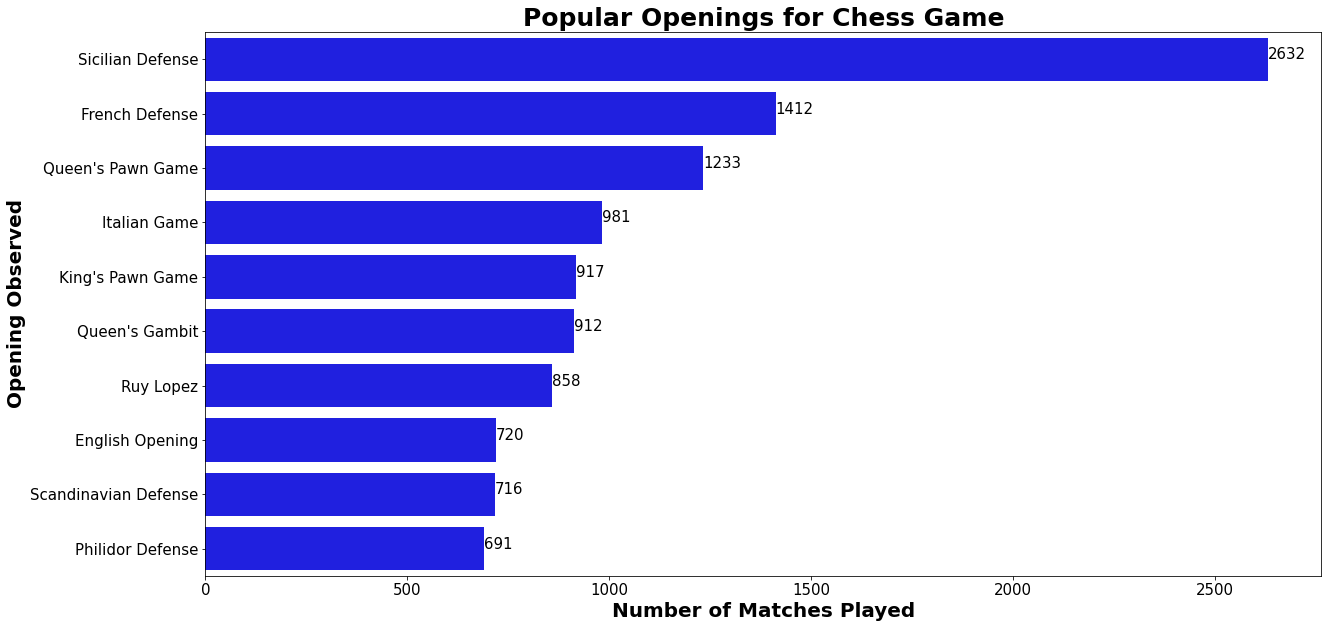

In [23]:
plt.figure(figsize=(20,10))
#plt.grid()
plt.title('Popular Openings for Chess Game',fontweight='bold',fontsize=25)
barplot = sns.barplot(x='Total',y='Opening Observed',data=gameopenings,color='blue');
barplot.set_xlabel("Number of Matches Played", fontweight='bold',fontsize = 20);
barplot.set_ylabel("Opening Observed", fontweight='bold', fontsize = 20);
#=============
barplot.annotate(2632, xy=(2632, 0), fontsize = 15)
barplot.annotate(1412, xy=(1412, 1), fontsize = 15)
barplot.annotate(1233, xy=(1233, 2), fontsize = 15)
barplot.annotate(981, xy=(981, 3), fontsize = 15)
barplot.annotate(917, xy=(917, 4), fontsize = 15)
barplot.annotate(912, xy=(912, 5), fontsize = 15)
barplot.annotate(858, xy=(858, 6), fontsize = 15)
barplot.annotate(720, xy=(720, 7), fontsize = 15)
barplot.annotate(716, xy=(716, 8), fontsize = 15)
barplot.annotate(691, xy=(691, 9), fontsize = 15)
#=============
plt.tick_params(labelsize=15)
plt.show()

## Q2. How did most of the games concluded?

In [24]:
finale = df.groupby('victory_status')[['game_id']].count()
finale.head()

,game_id
victory_status,
Draw,906
Mate,6325
Out of Time,1680
Resign,11147


In [25]:
finale = finale.sort_values('game_id',ascending = False).reset_index()
finale.rename(columns={'game_id':'Total','victory_status':'Conclusion'},inplace=True)
finale.head()

,Conclusion,Total
0,Resign,11147
1,Mate,6325
2,Out of Time,1680
3,Draw,906


In [26]:
labels = list(finale['Conclusion'])

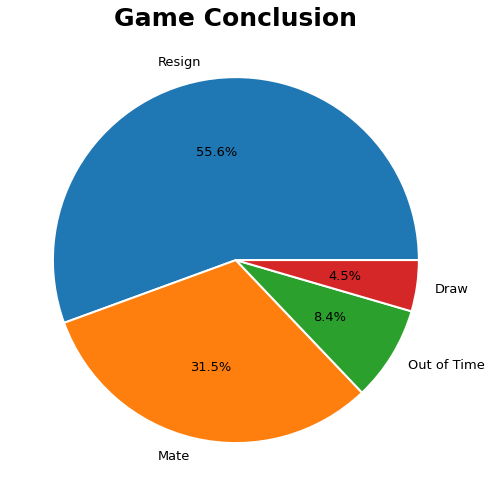

In [27]:
x = [11147, 6325, 1680, 906]
name = ['Resign', 'Mate', 'Out of Time', 'Draw']
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(x, labels=name, autopct='%.1f%%', textprops={'fontsize': 13},wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
ax.set_title('Game Conclusion',fontweight='bold',fontsize=25)
plt.tight_layout()

## Q3. What is the distribution of number of turns played in a match?

In [28]:
numberofturns = df.groupby('turns')[['game_id']].count()
numberofturns.head()

,game_id
turns,
1,18
2,185
3,87
4,52
5,40


In [29]:
numberofturns.info

<bound method DataFrame.info of        game_id
turns         
1           18
2          185
3           87
4           52
5           40
...        ...
222          2
226          1
255          1
259          1
349          2

[211 rows x 1 columns]>

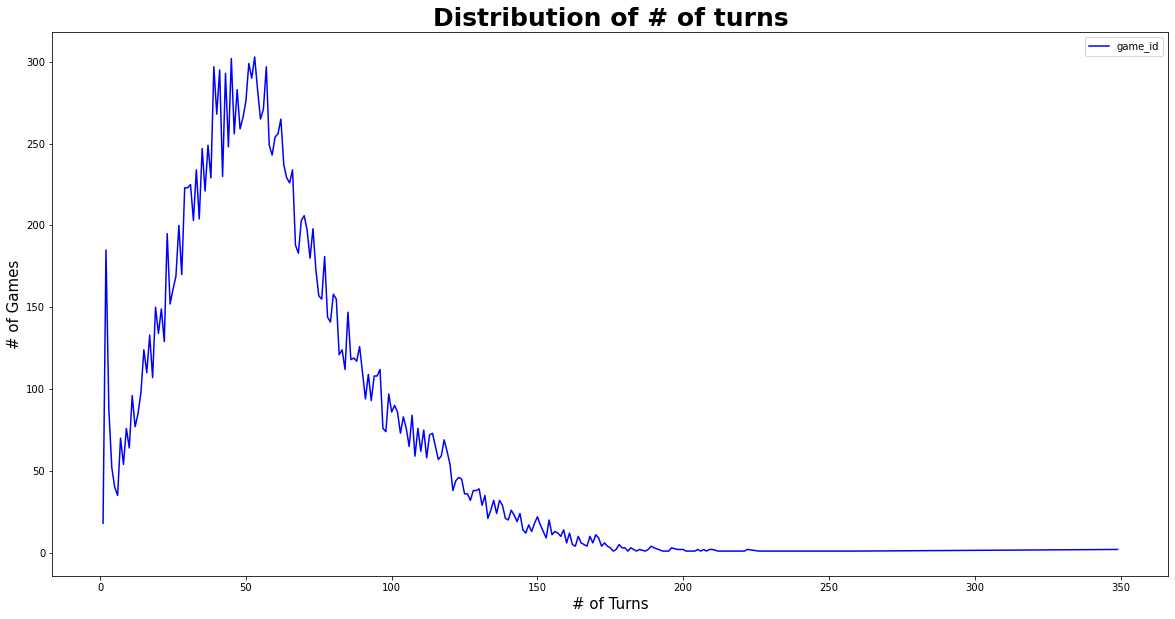

In [30]:
lines = numberofturns.plot.line(color = 'blue',figsize=(20,10))
plt.title("Distribution of # of turns",fontweight='bold',fontsize = 25)
lines.set_xlabel("# of Turns", fontsize = 15);
lines.set_ylabel("# of Games", fontsize = 15);
#plt.grid()

In [31]:
numberofturns.describe()

,game_id
count,211.000000
mean,95.061611
std,93.972645
min,1.000000
25%,11.000000
50%,65.000000
75%,159.500000
max,303.000000


## Q4. Which color is likely to win more games?

In [32]:
df.winner.unique()

array(['White', 'Black', 'Draw'], dtype=object)

In [33]:
colorwins = df.groupby('winner')[['game_id']].count()

In [34]:
colorwins

,game_id
winner,
Black,9107
Draw,950
White,10001


In [35]:
colorwins = colorwins.sort_values('game_id').reset_index()
colorwins.rename(columns = {'winner':'Winner','game_id':'Victories'},inplace=True)
colorwins.head()

,Winner,Victories
0,Draw,950
1,Black,9107
2,White,10001


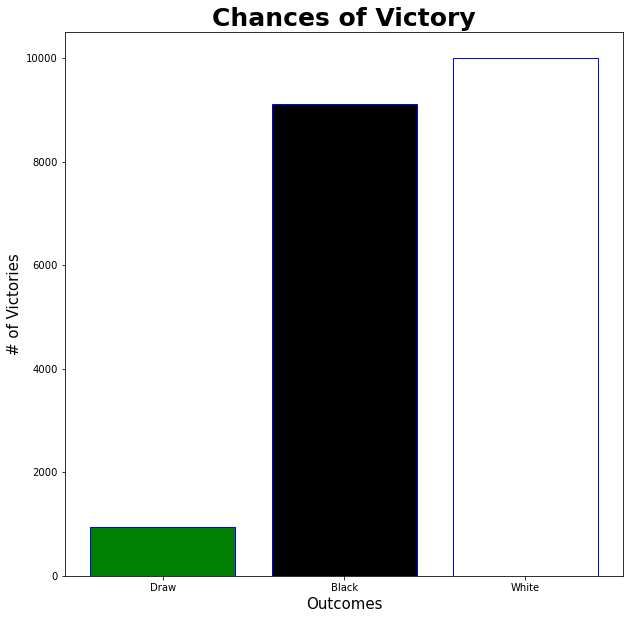

In [36]:
#Lets plot the Result
plt.figure(figsize=(10,10))
plt.title("Chances of Victory",fontweight='bold',fontsize=25)
plt.xlabel('Outcomes',fontsize=15)
plt.ylabel('# of Victories',fontsize=15)
plt.tick_params(labelsize=10)
plt.bar(colorwins.Winner, colorwins.Victories,edgecolor='blue',color=['green','black','white']);

plt.show()

## Q5. What is distribution of rated players?

In [37]:
whitegroup = df.groupby('white_rating')[['game_id']].count()
whitegroup

,game_id
white_rating,
784,2
788,1
793,1
795,1
798,2
...,...
2617,1
2619,2
2621,24


In [38]:
blackgroup = df.groupby('black_rating')[['game_id']].count()
blackgroup

,game_id
black_rating,
789,1
791,1
795,2
796,1
800,1
...,...
2571,1
2577,1
2588,1


Text(0, 0.5, '# of black group players')

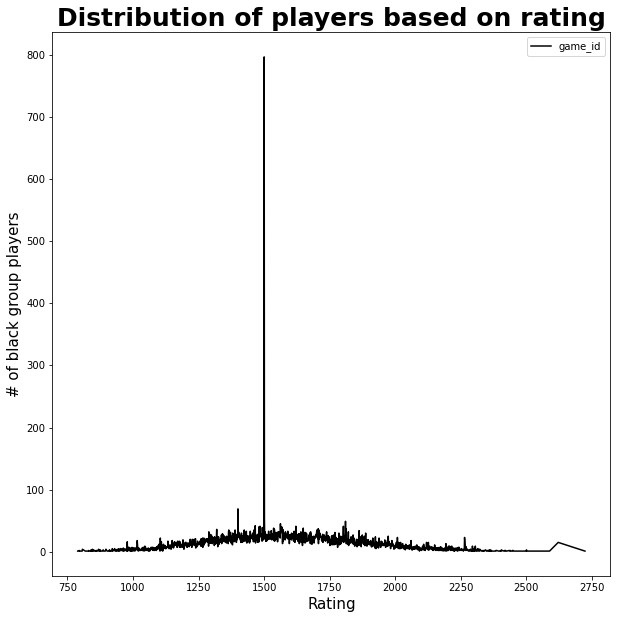

In [39]:
line1 = blackgroup.plot.line(color = 'black',figsize=(10,10))
plt.title("Distribution of players based on rating",fontweight='bold',fontsize=25)
plt.xlabel('Rating',fontsize=15)
plt.ylabel('# of black group players',fontsize=15)


Text(0, 0.5, '# of white group players')

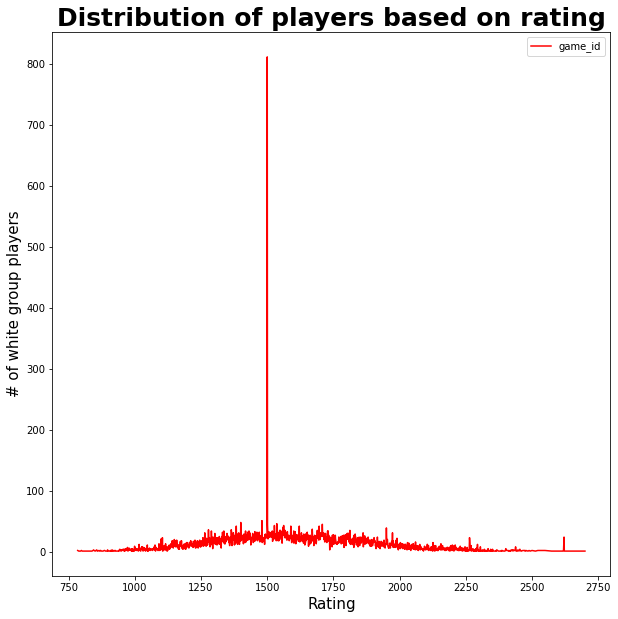

In [40]:
line2 = whitegroup.plot.line(color = 'red',figsize=(10,10))
plt.title("Distribution of players based on rating",fontweight='bold',fontsize=25)
plt.xlabel('Rating',fontsize=15)
plt.ylabel('# of white group players',fontsize=15)